# Project by Mikhail Mussel

[](#section1)
[](#section2)

## Project description

A client decided to open a small robot-run cafe in Los Angeles. This project is
promising but expensive, I was asked to help attract investors.
They’re interested in the current market conditions but will we be able
to maintain our success when the novelty of robot waiters wears off?
As an analytics guru, I was asked to prepare some market research.
I have have open-source data on restaurants in LA.


#### Data description

rest_data table:

object_name — establishment name

chain — chain establishment TRUE/FALSE

object_type — establishment type

address — address

number — number of seats

<a id='section1'></a>
### Loading and preparing the data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# loading the data

try:
    df = pd.read_csv('rest_data_us.csv')
except:
    df = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
# looking at the data

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
# dislaying info on the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Looks like the 'chain' column is incorrect datatype. It should be a boolean type. But let's check for other mistakes and/or misses in our data. 

In [5]:
# identifying missing values

df.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [6]:
# identifying unique values in 'chain' column

df.chain.unique()

array([False, True, nan], dtype=object)

There are 3 variations of string values in this column, we can drop the missing rows since their loss wouldn't impact our research that much. 

In [7]:
# dropping missing values

df.dropna(subset=['chain'], inplace=True)

In [8]:
# fixing existing values

df.chain = df.chain.astype(str)
df.chain = df.chain.str.strip()

In [9]:
# converting column datatype

df.chain = df.chain.map(lambda x: True if x=='True' else False).astype(bool) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


In [10]:
# checking for duplicated values

df.duplicated().sum()

0

The 'chain' column is of the correct datatype now and it appears we don't have any duplicates in our data so now we can start the analysis.

<a id='section2'></a>
### Data analysis
[Link to Section 1](#section1)

#### Investigate the proportions of the various types of establishments. Plot a graph.

In [11]:
# grouping the data by establishment type and count the occurrences

establishment_counts = df['object_type'].value_counts()
establishment_counts

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

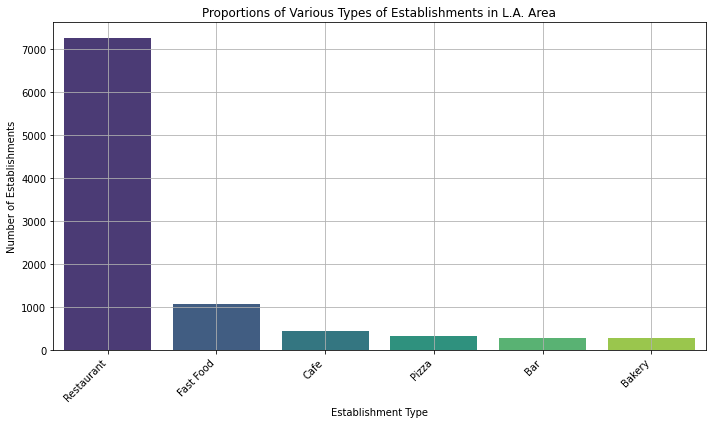

In [12]:
# plotting the proportions

plt.figure(figsize=(10, 6))
sns.barplot(x=establishment_counts.index, y=establishment_counts.values, palette='viridis')
plt.title('Proportions of Various Types of Establishments in L.A. Area')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Establishments')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

We see that restaurant type is by far the most popular in the area, would be great if other types had more representation.

#### Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [13]:
# counting the occurrences of chain and non-chain establishments

chain_counts = df['chain'].value_counts()
chain_counts

False    5972
True     3676
Name: chain, dtype: int64

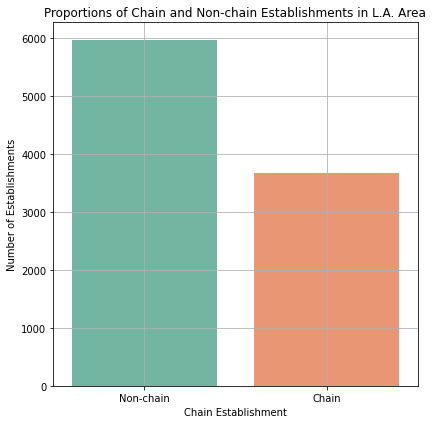

In [14]:
# plotting the proportions

plt.figure(figsize=(6, 6))
sns.barplot(x=chain_counts.index, y=chain_counts.values, palette='Set2')
plt.title('Proportions of Chain and Non-chain Establishments in L.A. Area')
plt.xlabel('Chain Establishment')
plt.ylabel('Number of Establishments')
plt.xticks(ticks=[0, 1], labels=['Non-chain', 'Chain'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Which type of establishment is typically a chain?

In [15]:
# grouping the data by establishment type and calculate the proportion of chain establishments

chain_proportions = df.groupby('object_type')['chain'].mean().sort_values(ascending=False)
chain_proportions

object_type
Bakery        1.000000
Cafe          0.611494
Fast Food     0.567542
Pizza         0.479624
Restaurant    0.316007
Bar           0.263699
Name: chain, dtype: float64

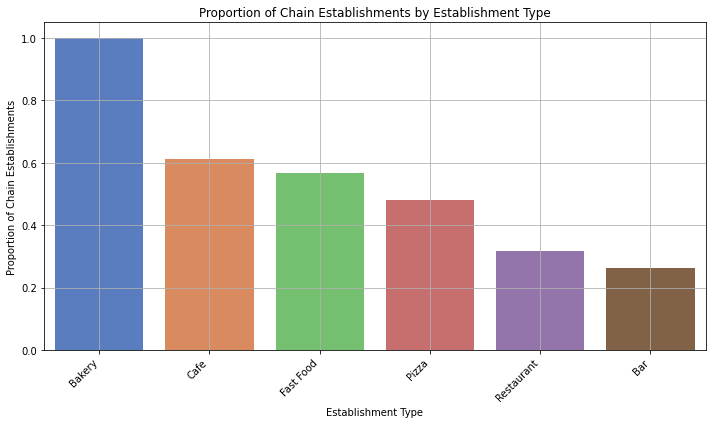

In [16]:
# plotting the chain proportions

plt.figure(figsize=(10, 6))
sns.barplot(x=chain_proportions.index, y=chain_proportions.values, palette='muted')
plt.title('Proportion of Chain Establishments by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Proportion of Chain Establishments')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

We found out that there are more non-chain establishments than chain ones. And bakeries are most prevelant chain establishments, makes sense.

#### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [17]:
# filtering the data to include only chain establishments

chain_data = df[df.chain == True]
chain_data.head()

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


In [18]:
# calculating summary statistics of the number of seats for chain establishments

mean_seats = chain_data.number.mean()
median_seats = chain_data.number.median()
seat_distribution = chain_data.number.describe()

print("Mean number of seats for chain establishments:", mean_seats)
print()
print("Median number of seats for chain establishments:", median_seats)
print()
print("Seat distribution for chain establishments:")
print()
print(seat_distribution)

Mean number of seats for chain establishments: 39.69423286180631

Median number of seats for chain establishments: 25.0

Seat distribution for chain establishments:

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64


Based on these statistics, we can conclude that chain establishments tend to have a wide range of seat capacities, with the majority having a moderate number of seats (around 25 to 44 seats), but some having significantly fewer or more seats. This suggests that chains may encompass both smaller establishments with a limited number of seats and larger establishments with a higher seating capacity.

#### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [19]:
# grouping the data by establishment type and calculate the mean number of seats

avg_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)
avg_seats_by_type

object_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

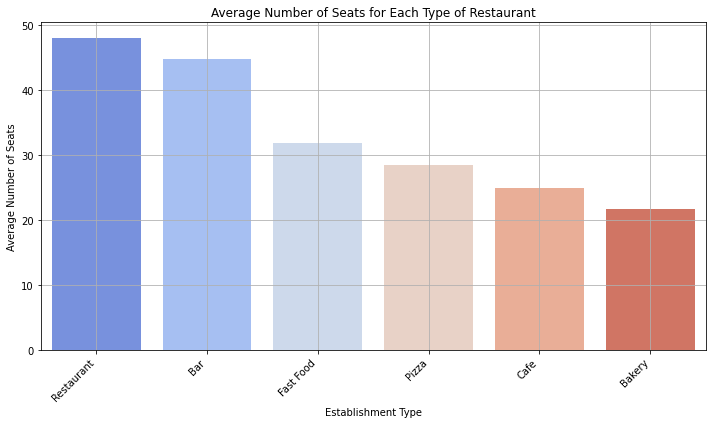

In [20]:
# plotting the average number of seats for each establishment type

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_seats_by_type.index, y=avg_seats_by_type.values, palette='coolwarm')
plt.title('Average Number of Seats for Each Type of Restaurant')
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Seats')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

It's clear that restaurant establishments would have higher number of seats on average compared to other types.

#### Put the data on street names from the address column in a separate column.

In [21]:
# defining a function to extract street names from addresses

def extract_street_name(address):
    
    # regular expression pattern to capture the last word as the street name
    
    pattern = r'\b(\w+\s+\w+)$'
    match = re.search(pattern, address)
    if match:
        return match.group(1)
    else:
        return None

In [22]:
# applying the function to extract street names

df['street_name'] = df['address'].apply(extract_street_name)
df.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,PARK AVE


#### Plot a graph of the top ten streets by number of restaurants.

In [23]:
# counting the number of restaurants on each street

restaurant_counts = df['street_name'].value_counts().nlargest(10)
restaurant_counts

SUNSET BLVD       333
PICO BLVD         315
FIGUEROA ST       223
VERMONT AVE       213
WESTERN AVE       199
OLYMPIC BLVD      187
HOLLYWOOD BLVD    177
3RD ST            175
WILSHIRE BLVD     171
BEVERLY BLVD      167
Name: street_name, dtype: int64

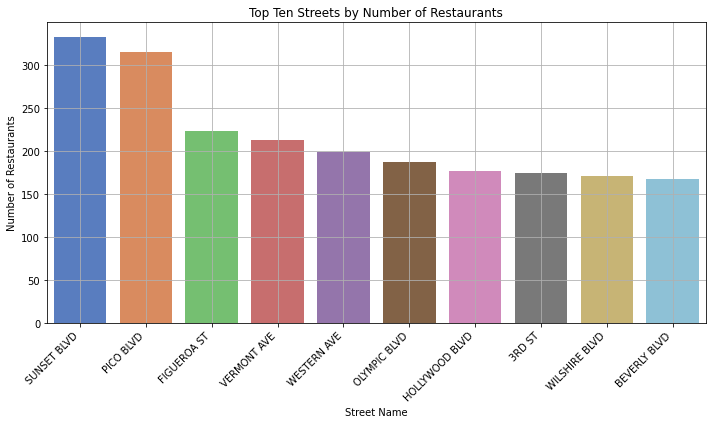

In [24]:
# plotting the top ten streets by number of restaurants

plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette='muted')
plt.title('Top Ten Streets by Number of Restaurants')
plt.xlabel('Street Name')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Find the number of streets that only have one restaurant.

In [25]:
# grouping the data by street name and count the number of restaurants on each street

street_restaurant_counts = df.street_name.value_counts()
street_restaurant_counts

SUNSET BLVD    333
PICO BLVD      315
FIGUEROA ST    223
VERMONT AVE    213
WESTERN AVE    199
              ... 
VILLAGE WAY      1
ST 239           1
BLVD 309         1
GARDNER ST       1
ST 116           1
Name: street_name, Length: 1358, dtype: int64

In [26]:
# filter streets with only one restaurant

streets_with_one_restaurant = street_restaurant_counts[street_restaurant_counts == 1]
streets_with_one_restaurant

STE 316        1
SHL S3         1
BLVD 2FL       1
UNIT 201       1
STE F100       1
              ..
VILLAGE WAY    1
ST 239         1
BLVD 309       1
GARDNER ST     1
ST 116         1
Name: street_name, Length: 864, dtype: int64

In [27]:
# getting the number of streets with only one restaurant

num_streets_with_one_restaurant = len(streets_with_one_restaurant)
num_streets_with_one_restaurant

864

That's a lot of establishments for one street, how curious.

#### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [28]:
# defining the threshold for streets with a lot of restaurants

threshold = 10

In [29]:
# grouping the data by street name and count the number of restaurants on each street

street_restaurant_counts = df.street_name.value_counts()
street_restaurant_counts

SUNSET BLVD    333
PICO BLVD      315
FIGUEROA ST    223
VERMONT AVE    213
WESTERN AVE    199
              ... 
VILLAGE WAY      1
ST 239           1
BLVD 309         1
GARDNER ST       1
ST 116           1
Name: street_name, Length: 1358, dtype: int64

In [30]:
# filtering streets with a lot of restaurants

streets_with_lots_of_restaurants = street_restaurant_counts[street_restaurant_counts >= threshold].index
streets_with_lots_of_restaurants

Index(['SUNSET BLVD', 'PICO BLVD', 'FIGUEROA ST', 'VERMONT AVE', 'WESTERN AVE',
       'OLYMPIC BLVD', 'HOLLYWOOD BLVD', '3RD ST', 'WILSHIRE BLVD',
       'BEVERLY BLVD',
       ...
       'GLENDON AVE', 'HOOPER AVE', 'AIRPORT BLVD', 'DALY ST', 'BARRINGTON CT',
       'STE 112', 'STE 111', 'STE 109', 'PLZ MALL', 'GLEN CIR'],
      dtype='object', length=143)

In [31]:
# filtering the data to include only restaurants located on these streets

restaurants_on_selected_streets = df[df.street_name.isin(streets_with_lots_of_restaurants)]
restaurants_on_selected_streets

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,ROCK BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,CAHUENGA BLVD
...,...,...,...,...,...,...,...
9644,21430,LA BUFADORA BAR,3470 E 1ST ST,False,Bar,24,1ST ST
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,STE 100


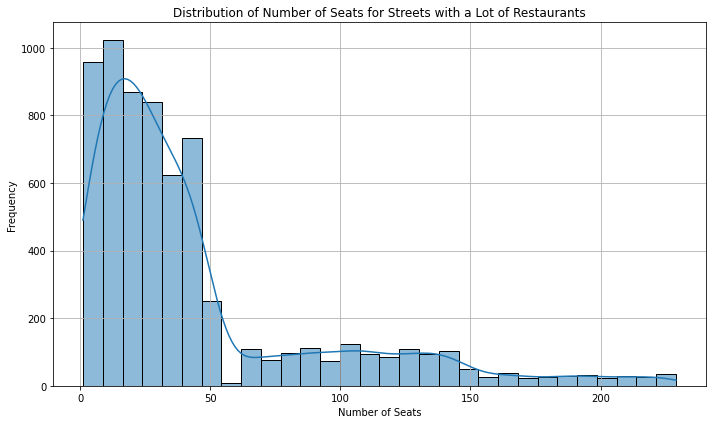

In [32]:
# plotting the distribution of the number of seats for restaurants on these streets

plt.figure(figsize=(10, 6))
sns.histplot(data=restaurants_on_selected_streets, x='number', bins=30, kde=True)
plt.title('Distribution of Number of Seats for Streets with a Lot of Restaurants')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

It seems that the lower ammount of seats - the higher the count of establishments for streets with a lot of restaurants.

### Recommendations:

**Enhancing Seating Capacity:**

*Recommendation:* Explore strategies to optimize seating capacity to meet demand.

**Diversifying Offerings:**

*Recommendation:* Encourage diversity in establishment types to cater to varied preferences.

[View Presentation](https://docs.google.com/presentation/d/1HZSnEYHZlwlAW6C0qngVmYLNFGcCBEVtJKUiKWmbakA/edit?usp=sharing)